# Part I - (Loan Data Exploration From Prosper)
## by Ngwe Becky

## Introduction
> Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# function to read a csv file and save in a pandas dataframe variable
def Upload_csv(dataset):
    data = pd.read_csv(dataset)
    return data

df_loan = Upload_csv('prosperLoanData.csv')
df_columns= ['Term','LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 
'BorrowerState', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount','LoanOriginationDate', 'Recommendations', 'Investors']
df_loan[df_columns].head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,0,CO,Self-employed,3083.333333,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.12016,0.0920,0.0820,A,2,CO,Employed,6125.000000,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,0,GA,Not available,2083.333333,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.12528,0.0974,0.0874,A,16,GA,Employed,2875.000000,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.24614,0.2085,0.1985,D,2,MN,Employed,9583.333333,15000,2013-09-20 00:00:00,0,20


In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df_loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
68631,DD36359503289266077A2CC,1035611,2013-11-25 23:29:55.370000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-6.63,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,68
63419,0C2A36005309552694E70BB,1131766,2014-01-25 11:51:04.730000000,NaN,36,Current,NaN,0.09030,0.0769,0.0669,...,-15.34,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,363
38391,57773599880390930E12489,1088659,2014-01-06 20:04:09.020000000,NaN,60,Current,NaN,0.21832,0.1940,0.1840,...,-9.34,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,3
4831,82CB3601861763468FAFFC0,1160374,2014-02-18 07:03:58.490000000,NaN,36,Current,NaN,0.07957,0.0659,0.0559,...,0.00,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,1
3203,95193565169259282074D79,682139,2012-12-04 23:24:34.077000000,NaN,36,Past Due (61-90 days),NaN,0.25781,0.2199,0.2099,...,-34.46,-24.94,0.0,0.0,0.0,0.7684,0,0,0.0,46
82643,7FCA35938504580876A0AAB,986107,2013-11-08 10:50:29.543000000,NaN,36,Current,NaN,0.10038,0.0869,0.0769,...,-49.16,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,183
3222,2DF43601669475074C5EE34,1188437,2014-02-10 15:25:00.283000000,NaN,36,Current,NaN,0.24603,0.2080,0.1980,...,0.00,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,1
71663,C32133882234522719FBC2B,136967,2007-05-14 05:58:30.723000000,C,36,Completed,2010-06-09 00:00:00,0.26059,0.2530,0.2430,...,-433.92,0.00,0.0,0.0,0.0,1.0000,1,0,0.0,153
36694,A7903561139019974A9739E,654081,2012-10-15 09:08:39.333000000,NaN,60,Current,NaN,0.23656,0.2118,0.2018,...,-24.66,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,1
96801,F9C4342631379740796A1E7,368009,2008-07-15 17:32:53.867000000,E,36,Completed,2010-03-16 00:00:00,0.28929,0.2660,0.2560,...,-19.14,0.00,0.0,0.0,0.0,1.0000,0,0,0.0,52


>Note that the dataset consist of 81 columns. For this context, the following columns(variables) were used:

In [6]:
target_columns = [
    'Term','LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore','TotalProsperLoans', 'ListingCategory (numeric)', 
'BorrowerState', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount','LoanOriginationDate', 'Recommendations', 'Investors'
]

In [7]:
target_df = df_loan[target_columns]

In [8]:
target_df.sample(10)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,TotalProsperLoans,ListingCategory (numeric),BorrowerState,EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
24114,36,Current,0.21945,0.1824,0.1724,C,5.0,NaN,1,CA,Employed,7500.000000,15000,2013-06-19 00:00:00,0,1
2468,36,Chargedoff,0.17445,0.1600,0.1500,NaN,NaN,NaN,4,CA,Full-time,3166.666667,15000,2008-04-21 00:00:00,0,535
48937,36,Current,0.19859,0.1620,0.1520,C,2.0,NaN,1,NJ,Self-employed,10000.000000,15000,2014-01-13 00:00:00,0,1
77838,36,Past Due (61-90 days),0.30532,0.2699,0.2599,D,5.0,NaN,1,MD,Employed,7778.416667,7000,2011-09-28 00:00:00,0,4
24724,60,Current,0.20808,0.1840,0.1740,C,6.0,NaN,1,PA,Employed,4583.333333,15000,2013-10-28 00:00:00,0,1
69682,60,Current,0.16993,0.1465,0.1365,B,6.0,NaN,1,FL,Employed,4383.333333,15000,2014-02-11 00:00:00,0,1
12117,36,Current,0.12528,0.0974,0.0874,A,9.0,1.0,3,FL,Employed,8333.333333,10000,2012-01-06 00:00:00,0,167
111866,60,Completed,0.31375,0.2870,0.2770,D,5.0,NaN,1,CA,Employed,6291.666667,9500,2012-06-27 00:00:00,0,33
79078,36,Current,0.22659,0.1890,0.1790,C,4.0,NaN,1,KS,Employed,6250.000000,15000,2014-03-06 00:00:00,0,200
103544,36,Completed,0.27255,0.2495,0.2395,NaN,NaN,1.0,1,MI,Full-time,2150.000000,4800,2008-08-05 00:00:00,0,97


In [9]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   LenderYield                113937 non-null  float64
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   ProsperScore               84853 non-null   float64
 7   TotalProsperLoans          22085 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   BorrowerState              108422 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  StatedMonthlyIncome        113937 non-null  float64
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanOriginationDate        11

In [10]:
target_df.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,TotalProsperLoans,ListingCategory (numeric),StatedMonthlyIncome,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,22085.000000,113937.000000,1.139370e+05,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,5.950067,1.421100,2.774209,5.608026e+03,8337.01385,0.048027,80.475228
std,10.436212,0.080364,0.074818,0.074516,2.376501,0.764042,3.996797,7.478497e+03,6245.80058,0.332353,103.239020
min,12.000000,0.006530,0.000000,-0.010000,1.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,4.000000,1.000000,1.000000,3.200333e+03,4000.00000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,6.000000,1.000000,1.000000,4.666667e+03,6500.00000,0.000000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,8.000000,2.000000,3.000000,6.825000e+03,12000.00000,0.000000,115.000000
max,60.000000,0.512290,0.497500,0.492500,11.000000,8.000000,20.000000,1.750003e+06,35000.00000,39.000000,1189.000000


Since Prosper use their own proprietary Prosper Rating only since 2009, there is a lot of missing values in ProsperRating column. Let's drop these missing values:

In [11]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Convert LoanOriginationDate to datetime datatype

In [12]:
target_df['LoanOriginationDate']= pd.to_datetime(target_df['LoanOriginationDate'])

Replace the NaN values of TotalProsperLoans with 0

In [13]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

In [14]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerAPR                84853 non-null  float64       
 4   BorrowerRate               84853 non-null  float64       
 5   LenderYield                84853 non-null  float64       
 6   ProsperRating (Alpha)      84853 non-null  object        
 7   ProsperScore               84853 non-null  float64       
 8   TotalProsperLoans          84853 non-null  float64       
 9   ListingCategory (numeric)  84853 non-null  int64         
 10  BorrowerState              84853 non-null  object        
 11  EmploymentStatus           84853 non-null  object        
 12  Stat

In [15]:
# Remove loans with missing borrower APR information
target_df = target_df[~target_df.BorrowerAPR.isna()]

### What is the structure of your dataset?

> the target_df dataset consist 15 columns and 84853 entries.

### What is/are the main feature(s) of interest in your dataset?
> I would like to check what are the major factors connected with borrower APR (Annual Percentage Rate) and borrower rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status.

## Univariate Exploration


In [16]:
# a function to call for univariate exploration
def UnivariateExploration(target_data,target_column):
    base_color = sns.color_palette()[0]
    plt.xticks(rotation = 90)
    sns.countplot(data=target_data, x= target_column, color=base_color)

## BorrowerAPR and BorrowerRate
> BorrowerAPR: borrower's annual percentage rate (APR) refers to the yearly interest generated by a sum that's charged to borrowers or paid to investors.

> BorrowerRate: the interest rate is the amount a lender charges a borrower and is a percentage of the principal.

> APR is always higher than the interest rate

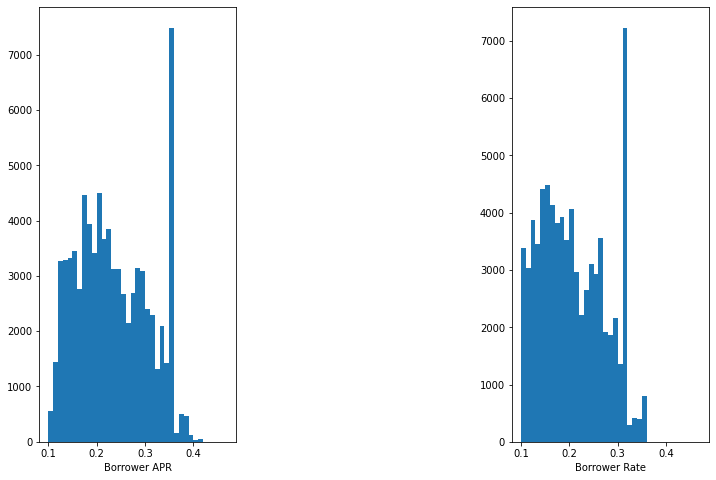

In [17]:
bins = np.arange(0.1, target_df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[12, 8])
plt.subplot(1,3,1)
plt.hist(data = target_df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

plt.subplot(1,3,3)
plt.hist(data = target_df, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate');

**Observation 1**
* There is a slight difference between borrowerAPR and borrower rate
* There is a large spike between 0.3 to 0.4 this implies most of the borrowerAPR and borrower rate is approximately 0.3 percent

###  Loan Original Amount

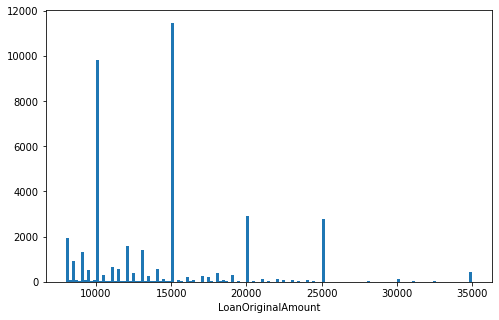

In [18]:
bins = np.arange(8000, target_df.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = target_df, x = 'LoanOriginalAmount' , bins = bins);
plt.xlabel('LoanOriginalAmount');

**Observation 2**
* The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. It means that most of the loans are multiples of 1k.

### Loan Status

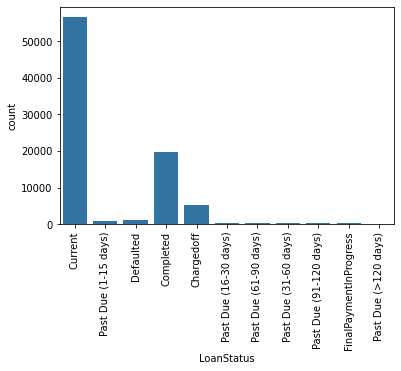

In [19]:
UnivariateExploration(target_df, 'LoanStatus')

**Observation 3:**
<ul>
<li>Majority of loans are actually current loans</li>
<li>Past due loans are splitted into several groups depending on the length of payment delay</li>
<li>Other big part is completed loans, defaulted loans compromise a minority, also chargedoff loan compromise a substantial amount.</li>
</ul>

### Stated Monthly Income

(array([3.8370e+03, 1.8651e+04, 2.3278e+04, 1.6672e+04, 1.0107e+04,
        5.1650e+03, 2.4910e+03, 1.7180e+03, 9.2000e+02, 6.6600e+02,
        2.8600e+02, 3.3500e+02, 1.0000e+02, 1.0000e+02, 1.4300e+02,
        5.7000e+01, 6.0000e+01, 3.7000e+01, 2.3000e+01, 5.1000e+01,
        1.4000e+01, 2.1000e+01, 1.2000e+01, 2.1000e+01, 7.0000e+00,
        3.0000e+00, 8.0000e+00, 3.0000e+00, 6.0000e+00, 3.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 1.0000e+00,
        7.0000e+00, 1.0000e+00, 8.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

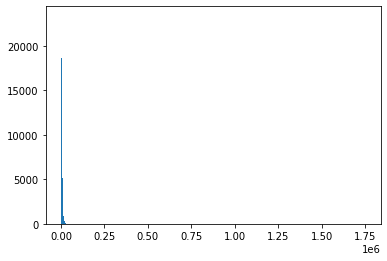

In [20]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000)

(<b>Note</b>: Distribution of stated monthly income is highly skewed to the right. So, we have to check how many outliers are there.)

**After zooming the graph, this is gotten**

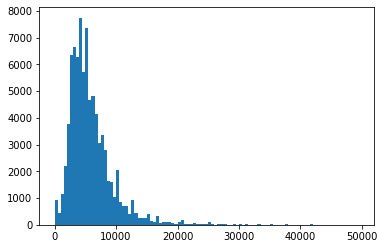

In [21]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = target_df, x = 'StatedMonthlyIncome', bins=bins_smi);
#plt.xlim(0, boundary);

**Observation 4:**
* The distribution of stated monthly income is severely right screwed.
* Most of the stated monthly income is less than 30K

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of monthly stated income is very awkward: with a lot of outliers and very large range but still it was right skew. The majority of borrowers are employed and all other categories as small part of borrowers and most of the loans in the data set are actually current loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [22]:
# adjusting the form of data
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

**After transforming dataset we have 19664 completed loans and 6341 defaulted.**

In [23]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categorie, axis=1)
target_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

variable listing category is set up as numeric and most of the values have very `low frequency`, for the easier visualization so we have change it to `categorical and reduce the number of categories`.

### Status and prosper Rating

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Employed'),
  Text(2, 0, 'Full-time'),
  Text(3, 0, 'Not employed'),
  Text(4, 0, 'Self-employed'),
  Text(5, 0, 'Retired'),
  Text(6, 0, 'Part-time')])

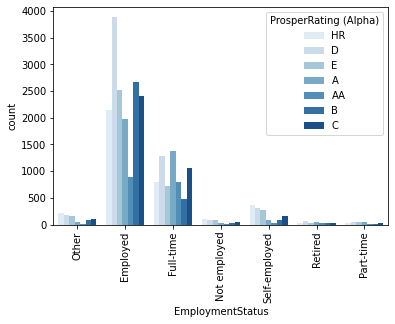

In [24]:
sns.countplot(data=target_df, x='EmploymentStatus', hue='ProsperRating (Alpha)', palette='Blues')
plt.xticks(rotation= 90)

**Observation 1:**
* The `most frequency` rating is among employed workers and the least frequency is among part-time workers.
* And the `most frequent` rating among employed workers is `D` and second highest is `B` and son on.

### Borrower state and Prosper rating

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'FL'),
  Text(1, 0, 'IL'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'CO'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'KS'),
  Text(6, 0, 'VA'),
  Text(7, 0, 'GA'),
  Text(8, 0, 'MN'),
  Text(9, 0, 'MD'),
  Text(10, 0, 'WI'),
  Text(11, 0, 'OH'),
  Text(12, 0, 'PA'),
  Text(13, 0, 'AL'),
  Text(14, 0, 'TX'),
  Text(15, 0, 'KY'),
  Text(16, 0, 'OK'),
  Text(17, 0, 'OR'),
  Text(18, 0, 'WA'),
  Text(19, 0, 'MI'),
  Text(20, 0, 'MO'),
  Text(21, 0, 'NC'),
  Text(22, 0, 'NJ'),
  Text(23, 0, 'TN'),
  Text(24, 0, 'NM'),
  Text(25, 0, 'CT'),
  Text(26, 0, 'ID'),
  Text(27, 0, 'AZ'),
  Text(28, 0, 'WV'),
  Text(29, 0, 'NV'),
  Text(30, 0, 'AR'),
  Text(31, 0, 'SC'),
  Text(32, 0, 'NH'),
  Text(33, 0, 'IN'),
  Text(34, 0, 'LA'),
  Text(35, 0, 'NE'),
  Text(36, 0, 'AK'),
  Text(37, 0, '

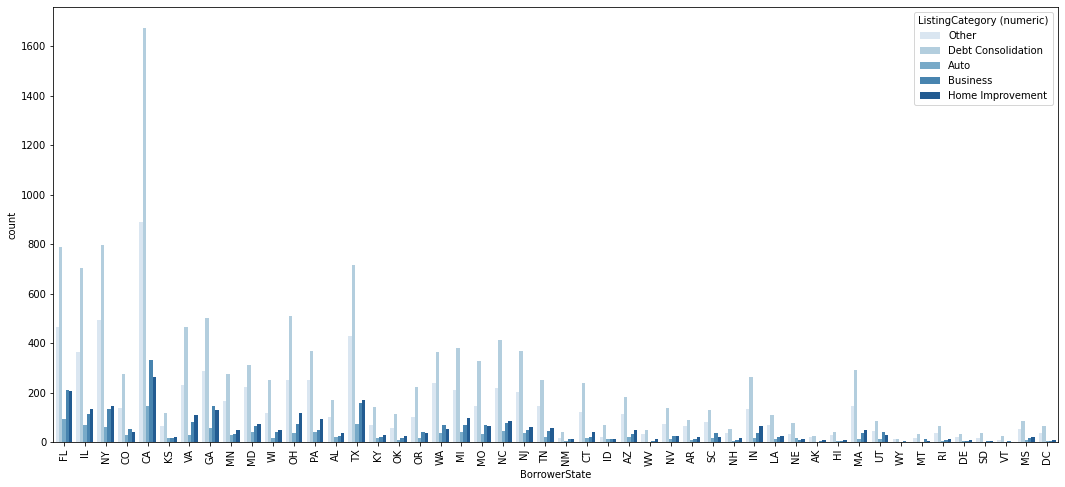

In [25]:
plt.figure(figsize=[18, 8])
sns.countplot(data=target_df, x='BorrowerState', hue = 'ListingCategory (numeric)', palette='Blues');
plt.xticks(rotation = 90)

Observation 2:
* The `debt consolidation` have `most frequency among all of them.` with its highest frequency being at `CA`
* The highest listing category being focused at CA.

## Loan Status and Loan Amount

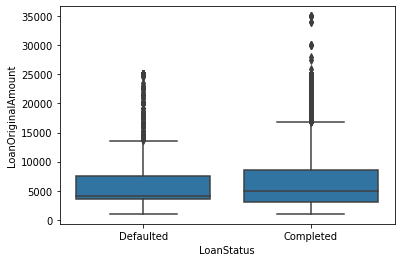

In [26]:
base_color = sns.color_palette()[0]
sns.boxplot(data=target_df, x='LoanStatus', y='LoanOriginalAmount', color= base_color);

Observation 3:
* As from above graph we can state that `defaulted credits` is `smaller` than `completed credits` onces

## Relationship between Employment Status and Prosper Rating

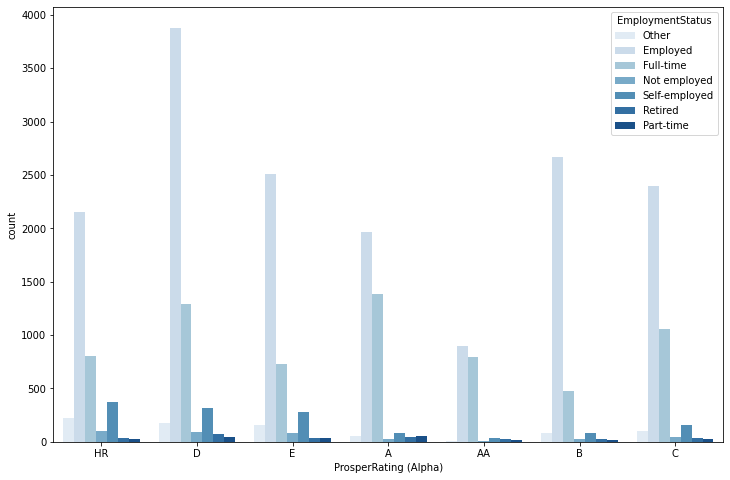

In [27]:
plt.figure(figsize=[12, 8])
sns.countplot(data=target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette='Blues');

Observation 4:
* Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-Employed, Retired and Part-Time.
* The highest Prosper ratings being focused at `D`

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Prosper rating D is the most frequent rating among defaulted credits.

## Multivariate Exploration



In [28]:
loan_sub = target_df[target_columns]
# data wrangling, remove loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)
loan_sub.shape

(25936, 16)

## Borrower APR vs. Prosper Rating

Text(0.5, 1.0, 'Borrower APR vs Prosper Rating')

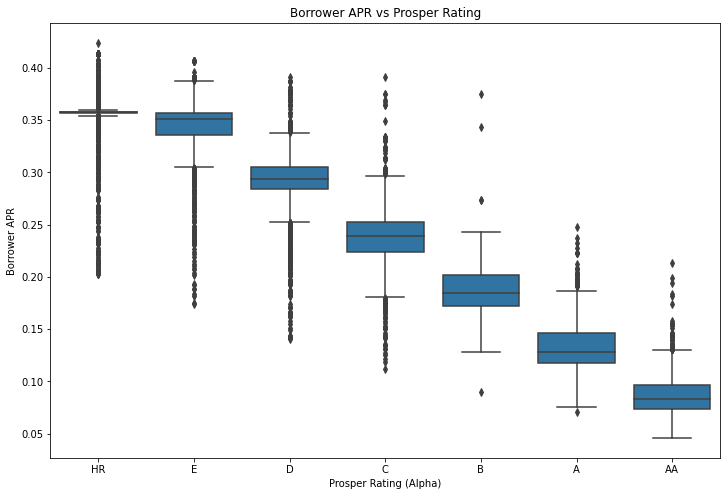

In [29]:
plt.figure(figsize=[12, 8])
base_color= sns.color_palette()[0]
sns.boxplot(data= loan_sub, x= 'ProsperRating (Alpha)', y= 'BorrowerAPR', color= base_color)

plt.ylabel('Borrower APR')
plt.xlabel('Prosper Rating (Alpha)')
plt.title('Borrower APR vs Prosper Rating')

Observation 1:
* Borrower APR decreases with an increase in Prosper ratings.
* Borrowers with the least APR has the best Prosper ratings.

## Effect of ProsperRating and Terms on StatedMonthlyIncome and LoanOriginalAmount

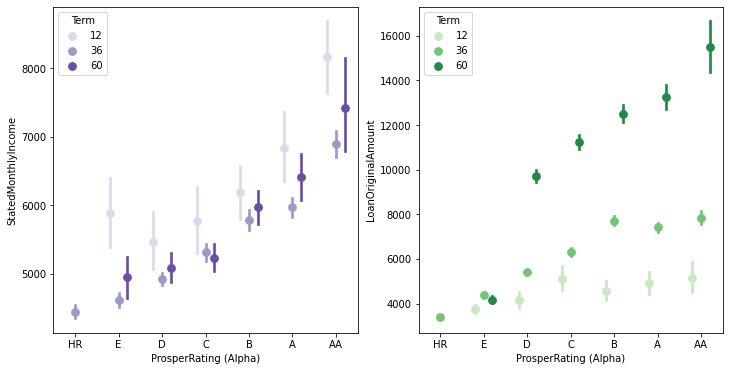

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sns.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sns.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

Observation 2:
* It can be seen that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.
* High monthly income implies high Prosper ratings.

## Borrower APR by Rating and Term

Text(0.5, 1.0, 'Borrower APR by Rating and Term')

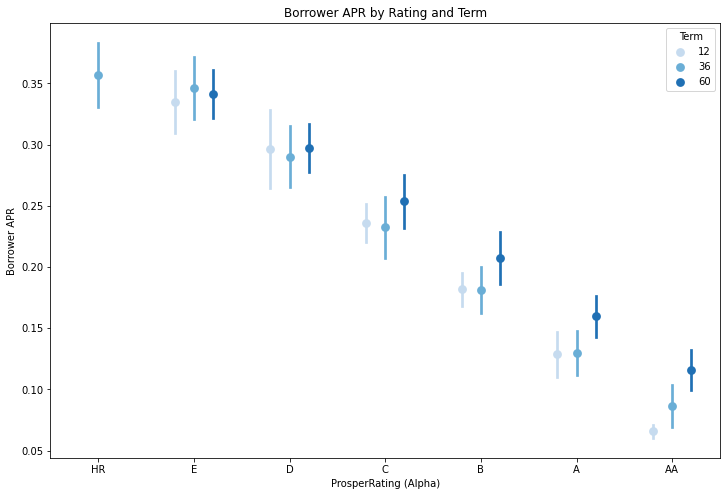

In [31]:
plt.figure(figsize=[12, 8])
sns.pointplot(data= loan_sub, x= 'ProsperRating (Alpha)', y= 'BorrowerAPR', palette= 'Blues', hue = 'Term',
     linestyles= '', dodge= 0.4, ci='sd')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR by Rating and Term')

Observation 3:
*  The borrower APR fluctuates with an increase in borrow term for people with HR-C ratings.
* The APR increase with the increase of borrow term for people with B-AA ratings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the multivariant exploration, first observation was that with better Prosper ratings the borrower APR decreases. Secondly,  I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger. Finally, borrower APR fluctuates with an increase in borrow term for people with HR-C ratings.

### Were there any interesting or surprising interactions between features?

> Interesting finding was that, the borrowerAPR fluctuates with an increase in borrow term from HR-C ratings and borrower APR increases with an increase in borrow term from B-AA ratings.